# Центральная предельная теорема своими руками

### В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

### Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

### Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

### Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

## 1) Для своего задания я выбрал Гамма распределение, которое есть в scipy.stats

### Комментарии из scipy reference:

### The probability density function for gamma is: 
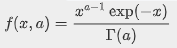
### for x > 0, a > 0. Here Г(a) refers to the gamma function.

### gamma takes a as a shape parameter for .

### When a is an integer, gamma reduces to the Erlang distribution, and when a = 1 to the exponential distribution.

### The probability density above is defined in the “standardized” form. To shift and/or scale the distribution use the loc and scale parameters. Specifically, gamma.pdf(x, a, loc, scale) is identically equivalent to gamma.pdf(y, a) / scale with y = (x - loc) / scale.

### Инфо из Вики: https://en.wikipedia.org/wiki/Gamma_distribution

In [1]:
#импортирование необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from math import sqrt
%matplotlib inline

### 2) Сгенерируем выборку объема 1000

In [2]:
# параметры распределения
a = 1.2

#frozen distribution
distributionRv = sts.gamma(a, loc=0, scale=1)

# сгенерируем 1000 значений
distributionSample = distributionRv.rvs(1000)

#проверка задания распределения
print('Theoretical mean: ', distributionRv.mean())
print('Theoretical standard deviation: ', distributionRv.std())

Theoretical mean:  1.2
Theoretical standard deviation:  1.0954451150103321


### 3) Построение гистограммы выборки и графика теоритеческой плотности распределения случайной величины

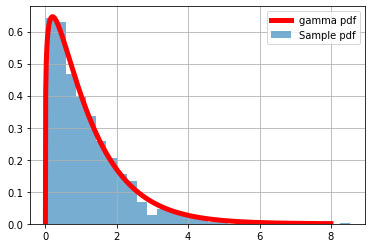

In [3]:
#гистограмма выборки
plt.hist(distributionSample, bins=30, density = True, alpha = 0.6, histtype='stepfilled', label='Sample pdf')

#теоретическая плотность распределения
x = np.linspace(0,8,1000)
plt.plot(x, sts.gamma.pdf(x, a), 'r-', lw=5, label='gamma pdf')
plt.legend(loc='best', frameon=True)
plt.grid(True)

### 4) Генерация 1000 выборок объёма n (5, 10, 50) и построение гистограммы распределений их выборочных средних.

In [4]:
#количество выборок
sample_num = 1000

#массив объёма выборок
sample_volume = [5, 10, 50]

#массив под выборочное среднее значение, заполненный нулями
distribution_samples = np.zeros((len(sample_volume), sample_num))

#вычисление выборочных средних значений и занесение в массив
for i in range(len(sample_volume)):
    for j in range(sample_num):
        distribution_sample_temp = np.array(sts.gamma.rvs(a, loc=0, scale=1, size=sample_volume[i]))
        distribution_sample_temp_mean = distribution_sample_temp.mean()
        distribution_samples[i, j] = distribution_sample_temp_mean
        
print(distribution_samples)

[[0.39715339 1.13966228 0.4564255  ... 0.55914698 1.05043324 1.81924829]
 [1.2516365  1.10244291 1.27924166 ... 0.74405996 0.69367785 1.20002978]
 [1.05090235 1.10635229 1.24168066 ... 1.26298484 1.23835086 1.36929702]]


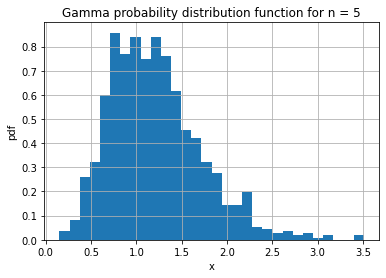

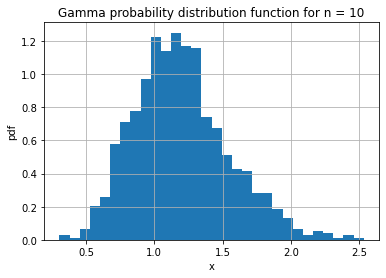

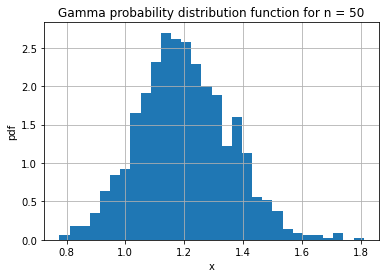

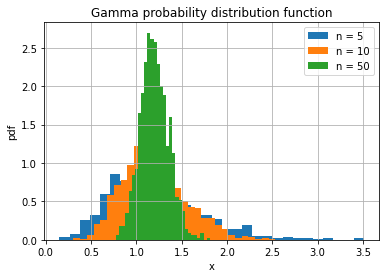

In [5]:
#гистограммы выборок
for i in range(len(sample_volume)):
    plt.hist(distribution_samples[i], bins=30, density=True)
    plt.grid(True)
    plt.title('Gamma probability distribution function for n = ' + str(sample_volume[i]))
    plt.xlabel('x')
    plt.ylabel('pdf')
    plt.show()
    
for i in range( len(sample_volume) ):
    plt.hist(distribution_samples[i], bins=30, density=True, label='n = ' + str(sample_volume[i]))
    plt.grid(True)
    plt.title('Gamma probability distribution function')
    plt.legend(loc='best')
    plt.xlabel('x')
    plt.ylabel('pdf')

### 5) Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитаем значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних.

In [6]:
#Математическое ожидание и дисперсия

distribution_sample_mean = a
distribution_sample_variance = np.zeros( len(sample_volume) )
for i in range( len(sample_volume) ):
    distribution_sample_variance[i] = a / sample_volume[i]
    
print("Математическое ожидание: " + str(distribution_sample_mean))
for i in range( len(sample_volume) ):
    print("Дисперсия для n = " + str(sample_volume[i]) + ": " + str(distribution_sample_variance[i]))

Математическое ожидание: 1.2
Дисперсия для n = 5: 0.24
Дисперсия для n = 10: 0.12
Дисперсия для n = 50: 0.024


### 6) Поверх каждой гистограммы нарисуем плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

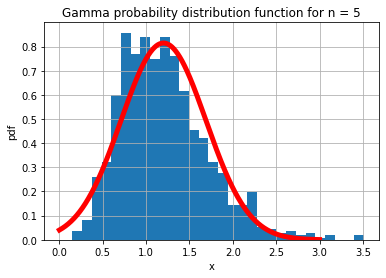

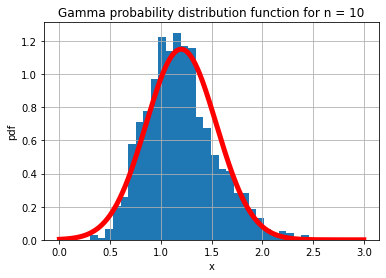

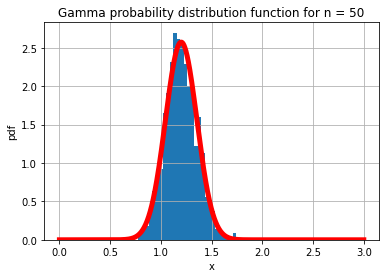

In [7]:
# гистограммы выборки
for i in range( len(sample_volume) ):
    plt.hist(distribution_samples[i], bins=30, density=True)
    plt.grid(True)
    plt.title('Gamma probability distribution function for n = ' + str(sample_volume[i]))
    plt.xlabel('x')
    plt.ylabel('pdf')
    
# зададим нормально распределенную случайную величину
    mu = distribution_sample_mean
    sigma = sqrt(distribution_sample_variance[i])
    normRv = sts.norm(loc=mu, scale=sigma)
    x = np.linspace(0,3,1000)
    pdf = normRv.pdf(x)
    plt.plot(x, pdf, 'r-', lw=5)
    plt.show()

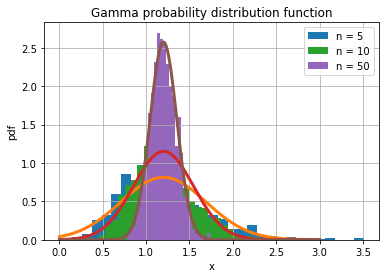

In [8]:
for i in range( len(sample_volume) ):
    plt.hist(distribution_samples[i], bins=30, density=True, label='n = ' + str(sample_volume[i]))
    plt.grid(True)
    plt.title('Gamma probability distribution function')
    plt.legend(loc='best')
    plt.xlabel('x')
    plt.ylabel('pdf')
    
# зададим нормально распределенную случайную величину
    mu = distribution_sample_mean
    sigma = sqrt(distribution_sample_variance[i])
    normRv = sts.norm(loc=mu, scale=sigma)    
    x = np.linspace(0,3,1000)
    pdf = normRv.pdf(x)
    plt.plot(x, pdf, lw=3)

### 7) Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

###### Как и утверждает центральная пределельная теорема, распределение выборочных средних довольно хорошо можно описать нормальным распределением. В ходе выполнения работы видно, что с ростом числа n точность аппроксимации распределения выборочных средних нормальным увеличивается.